In [ ]:
pip install tensorboard_logger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!curl https://colab.chainer.org/install | sh -
!pip install cucim
!pip install scipy scikit-image cupy-cuda100==9.6.0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0   9028      0 --:--:-- --:--:-- --:--:--  9028
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
+ pip install -q cupy-cuda100  chainer 
     |████████████████████████████████| 58.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.0 MB 59.6 MB/s 
+ set +ex
Installation succeeded!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 4.7 MB/s 
Looking in indexes: http

In [ ]:
!python pretrained_model.py --layers 28 --widen-factor 10

Files already downloaded and verified
=> loading best model weights 'drive/MyDrive/runs/1WideResNet-28-10/model_best.pth.tar'
=> loaded best model weights
[16, 16, 16, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640]
71
Files already downloaded and verified
Creating class_descriptors
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
1

In [ ]:
!python get_encodings.py

yes
3000
3000
<class 'tuple'>   10000   (array([[-0.67919954],
       [ 0.6186695 ],
       [-0.67105533],
       ...,
       [-0.20114191],
       [-0.96586398],
       [-0.1991657 ]]), 0)
<class 'tuple'>   10000   (array([[-0.51388636],
       [ 0.41503929],
       [-0.54940542],
       ...,
       [-0.26807219],
       [-0.86565011],
       [-0.21391584]]), 0)
<class 'tuple'>   10000   (array([[-0.67919954],
       [ 0.6186695 ],
       [-0.67105533],
       ...,
       [-0.20114191],
       [-0.96586398],
       [-0.1991657 ]]), 0)
<class 'tuple'>   10000   (array([[-0.51388636],
       [ 0.41503929],
       [-0.54940542],
       ...,
       [-0.26807219],
       [-0.86565011],
       [-0.21391584]]), 0)


In [ ]:
import get_encodings

3000
3000
<class 'tuple'>   10000   (array([[-0.02400178],
       [-0.96714272],
       [ 0.43035376],
       ...,
       [-0.85814836],
       [-0.62766638],
       [ 0.97497372]]), 0)
<class 'tuple'>   10000   (array([[ 0.11096486],
       [-1.60738897],
       [ 0.43303019],
       ...,
       [-1.28099219],
       [-0.88424054],
       [ 0.74407752]]), 0)
<class 'tuple'>   10000   (array([[-0.02400178],
       [-0.96714272],
       [ 0.43035376],
       ...,
       [-0.85814836],
       [-0.62766638],
       [ 0.97497372]]), 0)
<class 'tuple'>   10000   (array([[ 0.11096486],
       [-1.60738897],
       [ 0.43303019],
       ...,
       [-1.28099219],
       [-0.88424054],
       [ 0.74407752]]), 0)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
def OOD_detector(image_encoding, class_descriptors, theta_s):
    arccos_list = []
    for k, v in class_descriptors.items():
        if len(v) == 0:
            continue
        class_hv = v[0]
        dot_prod = np.dot(np.transpose(class_hv), image_encoding)
        arc_theta = dot_prod / (np.linalg.norm(class_hv)*np.linalg.norm(image_encoding))
        # print(arc_theta)
        arccos_list.append([k, arc_theta])
        arccos_list = sorted(arccos_list, key=lambda x:x[0])
    theta = list(map(lambda x: np.arccos(x[1])*(180/math.pi), arccos_list))
    closest_class = min(theta)
    result = 1 if closest_class > theta_s else 0
    closest_deg = round(closest_class[0][0])
    return result, closest_deg

In [ ]:
# results for far ood detection (MNIST)
def far_ood_results(theta_s):
    far_ood_res = []
    for e in get_encodings.far_ID_merge:
        image_encoding =  e[0]
        label = e[1]
        ood_pred, _ = OOD_detector(image_encoding, get_encodings.class_descriptors, theta_s)
        far_ood_res.append((ood_pred, label))
    return far_ood_res


In [ ]:
# results for near ood detection (CIFAR100)
    
def near_ood_results(theta_s):
    near_ood_res = []
    for e in get_encodings.near_ID_merge:
        image_encoding =  e[0]
        label = e[1]
        ood_pred, _ = OOD_detector(image_encoding, get_encodings.class_descriptors, theta_s)
        near_ood_res.append((ood_pred, label))
    return near_ood_res

In [ ]:
def F1_score(results):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for e in results:
        pred = e[0]
        y = e[1]
        if pred == y:
            if pred == 1:
                TP += 1
            else:
                TN += 1
        else:
            if pred == 1:
                FP += 1
            else:
                FN += 1
    f1_score = TP/(TP + (0.5)*(FP + FN))
    
    return f1_score

In [ ]:
#  F1 scores for theta_s between 10 and 50 degrees
from tqdm import tqdm
near_ood_f1 = []
far_ood_f1 = []
for theta_s in tqdm(range(10, 55, 1)):
    near_res_list = near_ood_results(theta_s)
    far_res_list = far_ood_results(theta_s)
    near_ood_f1.append(F1_score(near_res_list))
    far_ood_f1.append(F1_score(far_res_list))

100%|██████████| 45/45 [01:12<00:00,  1.60s/it]


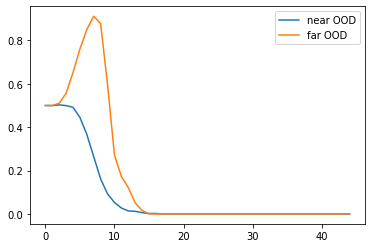

In [ ]:
plt.plot(near_ood_f1, label='near OOD')
plt.plot(far_ood_f1, label='far OOD')
plt.legend()

In [ ]:
# KDE plot
near_ood_degs = []
far_ood_degs = []
for e in get_encodings.near_list:
    image_encoding =  e[0]
    _, closest_deg = OOD_detector(image_encoding, get_encodings.class_descriptors, 0)
    near_ood_degs.append(closest_deg)
for e in get_encodings.far_list:
    image_encoding =  e[0]
    _, closest_deg = OOD_detector(image_encoding, get_encodings.class_descriptors, 0)
    far_ood_degs.append(closest_deg)


In [ ]:
def bucket_sort_degs(degs_list):
    buckets = {}
    for d in degs_list:
        if d in buckets.keys():
            buckets[d] += 1
        else:
            buckets[d] = 1
    return buckets

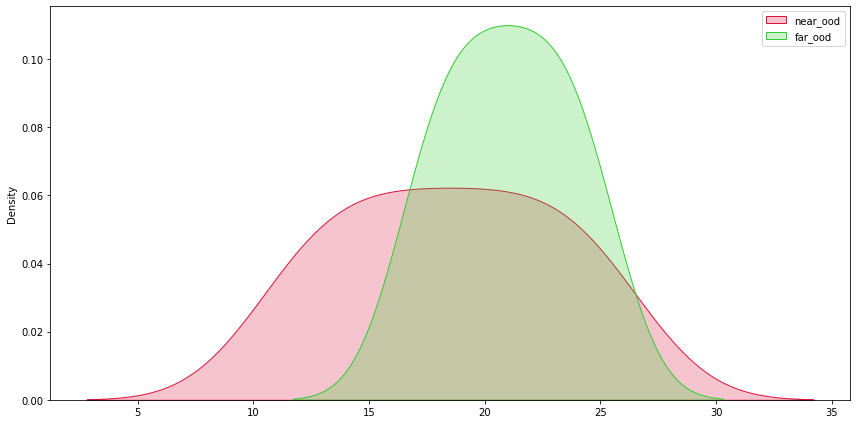

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

near_x = sorted(near_ood_buckets.keys())
near_y = sorted(near_ood_buckets.values())

far_x = sorted(far_ood_buckets.keys())
far_y = sorted(far_ood_buckets.values())

fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=near_y, x=near_x,
            color='crimson', label='near_ood', fill=True, ax=ax)
sns.kdeplot(data=far_y, x=far_x,
            color='limegreen', label='far_ood', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
def FP_TP(results):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for e in results:
        pred = e[0]
        y = e[1]
        if pred == y:
            if pred == 1:
                TP += 1
            else:
                TN += 1
        else:
            if pred == 1:
                FP += 1
            else:
                FN += 1
    tpr = TP/(TP+FN)
    fpr = FP/(FP+TN)
    return fpr, tpr

In [ ]:
# AUROC approximation
from tqdm import tqdm
near_TP_FP_list = []
far_TP_FP_list = []
for theta_s in tqdm(range(1, 90, 1)):
    near_res_list = near_ood_results(theta_s)
    far_res_list = far_ood_results(theta_s)
    near_TP_FP_list.append(FP_TP(near_res_list))
    far_TP_FP_list.append(FP_TP(far_res_list))

100%|██████████| 89/89 [02:23<00:00,  1.61s/it]


In [ ]:
def calc_auc_area(fpr_tpr_list):
    total_area = 0
    for i in range(len(fpr_tpr_list)-1):
        fpr_0 = fpr_tpr_list[i][0]
        tpr_0 = fpr_tpr_list[i][1]
        
        fpr_1 = fpr_tpr_list[i+1][0]
        tpr_1 = fpr_tpr_list[i+1][1]
        
        if fpr_0 == fpr_1:
            continue
        else:
            a = (fpr_0 - fpr_1)*(0.5)*(tpr_0 + tpr_1)
            total_area += a
    return total_area

In [ ]:
calc_auc_area(near_TP_FP_list[5:33])

0.5987017499999998

In [ ]:
calc_auc_area(far_TP_FP_list[5:31])

0.96604875